In [1]:
from sklearn.metrics import confusion_matrix

## Confusion Matrix

In [2]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0 ,0 ,2, 2, 0, 2]

In [3]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

## Binary Confusion Matrix

In [4]:
binary_y_true = [1, 0, 1, 1, 0, 1]
binary_y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(binary_y_true, binary_y_pred,labels=[1, 0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [5]:
from sklearn.metrics import classification_report

In [6]:
y_true = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]

In [7]:
confusion_matrix(y_true, y_pred,labels=[1, 0])

array([[2, 1],
       [3, 4]], dtype=int64)

In [8]:
print(classification_report(y_true,y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.80      0.57      0.67         7
     class 1       0.40      0.67      0.50         3

   micro avg       0.60      0.60      0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10



In [9]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

C:\Users\shjeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


In [10]:
confusion_matrix(y, y_hat, labels=[1, 0])

array([[6, 2],
       [1, 7]], dtype=int64)

In [11]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.16762769,  2.16762769,  1.03566193,  0.24472855, -0.06301587,
        -0.87838516, -1.02775912, -4.14855612]))

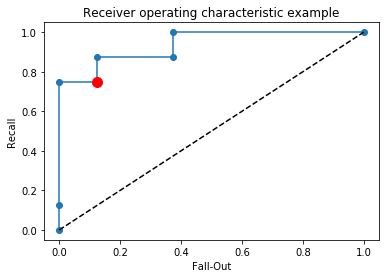

In [16]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()

In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

C:\Users\shjeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


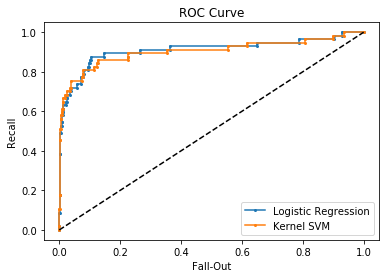

In [19]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()